# Pandas

In [1]:
#   Tip :
# ---------

import pandas
pandas.__version__

'0.24.2'

In [1]:
# Just as we generally import NumPy under the alias np, 
# we will import Pandas under the alias pd:

import pandas as pd

In [3]:
# Example of series data type 

population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [4]:
# By default, a Series will be created 
# where the index is drawn from the sorted value pairs.

# Unlike a dictionary, though, 
# the Series also supports array-style operations such as slicing:

population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [5]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [6]:
# data can be a scalar, which is repeated to fill the specified index:

pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [3]:
# data can be a dictionary, in which index defaults 
# to the sorted dictionary keys:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [8]:
# In each case, the index can be explicitly set 
# if a different result is preferred:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

In [9]:
pd.DataFrame(population, columns=['population'])

population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135

In [11]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
df = pd.DataFrame(data)
df

# please note : here column names are derived from the dictonary keys itself
# figure out : How can I change the column-names of a df ?
# try out df.columns = ['A', 'B']
# df.columns = ['A', 'B']
# df

a  b
0  0  0
1  1  2
2  2  4

In [11]:
# Even if some keys in the dictionary are missing, 
# Pandas will fill them in with NaN (i.e., “not a number”) values:

pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

a  b    c
0  1.0  2  NaN
1  NaN  3  4.0

In [12]:
import numpy as np
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'],
index=['a', 'b', 'c'])

foo       bar
a  0.146124  0.612919
b  0.101727  0.755202
c  0.715050  0.703841

# Note on : Indexers: loc and iloc

In [13]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [14]:
# explicit index when indexing
data[1]

'a'

In [15]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [16]:
data.loc[1]

'a'

In [17]:
data.loc[1:3]

1    a
3    b
dtype: object

In [18]:
data.iloc[1]

'b'

In [19]:
data.iloc[1:3]

3    b
5    c
dtype: object

# Data Retrieval

In [20]:
# List of Dictionaries to Dataframe

import pandas as pd
d =  [{'city':'Delhi',"data":1000},
      {'city':'Banglaore',"data":2000},
      {'city':'Mumbai',"data":1000}]
pd.DataFrame(d)  

# Two important things to note here: 
# first,  the keys of dictionary are picked up as the column names 
# in the dataframe 
# secondly, it picks up the default index of normal arrays.

city  data
0      Delhi  1000
1  Banglaore  2000
2     Mumbai  1000

In [26]:
# CSV Files to Dataframe

_data = pd.read_csv(filepath_or_buffer='datasets_module_1/student_records.csv')
_data.head()  # by default first 5 records

Name OverallGrade Obedient  ResearchScore  ProjectScore Recommend
0   Henry            A        Y             90            85       Yes
1    John            C        N             85            51       Yes
2   David            F        N             10            17        No
3  Holmes            B        Y             75            71        No
4  Marvin            E        N             20            30        No

In [27]:
_data.tail()  # by default the last 5 records

Name OverallGrade Obedient  ResearchScore  ProjectScore Recommend
3  Holmes            B        Y             75            71        No
4  Marvin            E        N             20            30        No
5   Simon            A        Y             92            79       Yes
6  Robert            B        Y             60            59        No
7   Trent            C        Y             75            33        No

# Data Access

In [29]:
# Slicing and Dicing of Series data

series_es = _data.ProjectScore
series_es

0    85
1    51
2    17
3    71
4    30
5    79
6    59
7    33
Name: ProjectScore, dtype: int64

In [30]:
series_es[1:7:2]  # from 1 to 7 show alternate records

1    51
3    71
5    79
Name: ProjectScore, dtype: int64

In [31]:
series_es[:5]    # from start to 5th record

0    85
1    51
2    17
3    71
4    30
Name: ProjectScore, dtype: int64

In [32]:
series_es[:-5]  # in the series we have 8 entries
                # -5 would give us 8-5 = 3 entries

0    85
1    51
2    17
Name: ProjectScore, dtype: int64

In [33]:
# For providing access to specific rows and specific columns, 
# pandas provides useful functions like iloc and loc 
# which can be used to refer to specific rows and columns in a dataframe.
_data.iloc[:5,:2]

Name OverallGrade
0   Henry            A
1    John            C
2   David            F
3  Holmes            B
4  Marvin            E

In [34]:
# Another access mechanism is Boolean based access to the dataframe rows 
# or columns.  
# Let’s consider the following example in which we want to select students 
# that have ResearchScore of more than 60 and their name starts with 'H':

import warnings; warnings.simplefilter('ignore')  # to suppress warnings

_data[_data['ResearchScore'] > 60] [_data['Name'].str.startswith('H')]

Name OverallGrade Obedient  ResearchScore  ProjectScore Recommend
0   Henry            A        Y             90            85       Yes
3  Holmes            B        Y             75            71        No

In [35]:
_greater_80  = _data.where(_data.ResearchScore > 79)
_greater_80

Name OverallGrade Obedient  ResearchScore  ProjectScore Recommend
0  Henry            A        Y           90.0          85.0       Yes
1   John            C        N           85.0          51.0       Yes
2    NaN          NaN      NaN            NaN           NaN       NaN
3    NaN          NaN      NaN            NaN           NaN       NaN
4    NaN          NaN      NaN            NaN           NaN       NaN
5  Simon            A        Y           92.0          79.0       Yes
6    NaN          NaN      NaN            NaN           NaN       NaN
7    NaN          NaN      NaN            NaN           NaN       NaN

# Data Operations

In [36]:
# creating a dataframe from NumPy array. Also adding column names.
df = pd.DataFrame(np.random.randn(8, 3),columns=['A', 'B', 'C'])
df

A         B         C
0 -1.210515  0.249432 -0.130777
1 -0.813300 -0.422668  0.530958
2  0.225739 -0.675235 -1.367470
3  0.251374 -0.056567 -0.064611
4  0.285615  2.267273 -0.880521
5  0.457131  0.116007 -0.899987
6  0.826547 -0.344534 -3.695036
7 -1.038155  0.991071 -0.982248

In [37]:
# we can extract all values from the data frame and get a np array. 
nparray = df.values
type(nparray)

numpy.ndarray

In [38]:
from numpy import nan
df.iloc[4,2] = nan   # make the element 4,2 as NaN

df

A         B         C
0 -1.210515  0.249432 -0.130777
1 -0.813300 -0.422668  0.530958
2  0.225739 -0.675235 -1.367470
3  0.251374 -0.056567 -0.064611
4  0.285615  2.267273       NaN
5  0.457131  0.116007 -0.899987
6  0.826547 -0.344534 -3.695036
7 -1.038155  0.991071 -0.982248

In [39]:
# now set the NaN to 0
df.fillna(0)   
# we can replace the missing value with any value.

# research on : imputation

A         B         C
0 -1.210515  0.249432 -0.130777
1 -0.813300 -0.422668  0.530958
2  0.225739 -0.675235 -1.367470
3  0.251374 -0.056567 -0.064611
4  0.285615  2.267273  0.000000
5  0.457131  0.116007 -0.899987
6  0.826547 -0.344534 -3.695036
7 -1.038155  0.991071 -0.982248

In [40]:
import numpy as np
import pandas as pd

vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [41]:
1 + np.nan  

nan

In [42]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [43]:
x = pd.Series(range(2), dtype=int)
print(x)
print("--------------")
x[0] = None
print(x)

0    0
1    1
dtype: int32
--------------
0    NaN
1    1.0
dtype: float64


# Descriptive Statistics Functions

In [44]:
columns_numeric = ['ResearchScore','ProjectScore']
_data[columns_numeric].mean()

ResearchScore    63.375
ProjectScore     53.125
dtype: float64

In [45]:
_data[columns_numeric].sum()

ResearchScore    507
ProjectScore     425
dtype: int64

In [46]:
_data[columns_numeric].count()  # no. of tuples or simply said "domain-count"

ResearchScore    8
ProjectScore     8
dtype: int64

In [47]:
_data[columns_numeric].median()

ResearchScore    75.0
ProjectScore     55.0
dtype: float64

In [48]:
_data[columns_numeric].quantile(0.8)  # 80 percentile

ResearchScore    88.0
ProjectScore     75.8
Name: 0.8, dtype: float64

In [49]:
_data[columns_numeric].sum(axis = 1)  # adds ResearchScore and Project Score

0    175
1    136
2     27
3    146
4     50
5    171
6    119
7    108
dtype: int64

In [50]:
# Pandas also provides us with another very handy function called describe. 
# This function will calculate the most important statistics for 
# numerical data in one go so that we don’t have to use individual functions.

_data[columns_numeric].describe()

ResearchScore  ProjectScore
count       8.000000      8.000000
mean       63.375000     53.125000
std        31.640559     24.752705
min        10.000000     17.000000
25%        50.000000     32.250000
50%        75.000000     55.000000
75%        86.250000     73.000000
max        92.000000     85.000000

# Concatenating Dataframes

In [51]:
## Let’s look at some examples to understand how the concat method works.

_data1 = _data.sample(3)  # random subset of main data frame
_data2 = _data.sample(3)

### Concatanating data frames
_data_combine = pd.concat([_data1,_data2])
_data_combine

Name OverallGrade Obedient  ResearchScore  ProjectScore Recommend
0   Henry            A        Y             90            85       Yes
4  Marvin            E        N             20            30        No
6  Robert            B        Y             60            59        No
0   Henry            A        Y             90            85       Yes
5   Simon            A        Y             92            79       Yes
3  Holmes            B        Y             75            71        No

In [52]:
# Another common scenario of concatenating is when we have information 
# about the columns of same dataframe split across different dataframes. 

# Then we can use the concat method again to combine all the dataframes. 

### Consider the following example.

## we are making a new dataframe
df1 = pd.DataFrame({'col1': ['col10', 'col11', 'col12', 'col13'],
                    'col2': ['col20', 'col21', 'col22', 'col23'],
                    'col3': ['col30', 'col31', 'col32', 'col33'],
                    'col4': ['col40', 'col41', 'col42', 'col43']},
                   index=[0, 1, 2, 3])
df1

col1   col2   col3   col4
0  col10  col20  col30  col40
1  col11  col21  col31  col41
2  col12  col22  col32  col42
3  col13  col23  col33  col43

In [53]:
# making another data frame
df4 = pd.DataFrame({'col2': ['col22', 'col23', 'col26', 'col27'],
                    'Col4': ['Col42', 'Col43', 'Col46', 'Col47'],
                    'col6': ['col62', 'col63', 'col66', 'col67']},
                   index=[2, 3, 6, 7])

# concating row wise
pd.concat([df1,df4], axis=1)

col1   col2   col3   col4   col2   Col4   col6
0  col10  col20  col30  col40    NaN    NaN    NaN
1  col11  col21  col31  col41    NaN    NaN    NaN
2  col12  col22  col32  col42  col22  Col42  col62
3  col13  col23  col33  col43  col23  Col43  col63
6    NaN    NaN    NaN    NaN  col26  Col46  col66
7    NaN    NaN    NaN    NaN  col27  Col47  col67

# Combining Datasets: Merge and Join

In [54]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [55]:
df3 = pd.merge(df1, df2)
df3

# The pd.merge() function recognizes that each DataFrame has an 
# “employee” column, and automatically joins using this column as a key.

employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [56]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [57]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})

print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [58]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [59]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})

print(df1); print(df3);

print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [60]:
# The result has a redundant column that we can drop if desired—for example, 
# by using the drop() method of DataFrames:

pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000

In [61]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])

print(df6); print(df7); 
pd.merge(df6, df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


name   food drink
0  Mary  bread  wine

In [62]:
# by default its always inner join
# can also be written as 
pd.merge(df6, df7, how='inner')

name   food drink
0  Mary  bread  wine

In [63]:
print(df6);  print("--------------"); print(df7); 

pd.merge(df6, df7, how='outer')

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
--------------
     name drink
0    Mary  wine
1  Joseph  beer


name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

# Practice Problems

In [64]:
# Because Pandas is designed to work with NumPy, 
# any NumPy ufunc will work on Pandas Series and DataFrame objects
# all missing values are filled in with NaN by default:

# What is the o/p ?
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [65]:
# Compute the population density. Given population and area data series.

area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
'California': 423967}, name='area')

population = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127}, name='population')

# divide above series to compute the population density:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [66]:
# add two series and fill with missing value with 0, instead of NaN

A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [67]:
# What is the output ?
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [68]:
# for the series 
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print(data)
# specify a forward-fill to propagate the previous value forward:
data.fillna(method='ffill')

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [69]:
# specify a back-fill to propagate the next values backward:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

# Hierarchical Indexing

Up to this point we’ve been focused primarily on one-dimensional and two dimensional data, stored in Pandas Series and DataFrame objects, respectively.

Often it is useful to go beyond this and store higher-dimensional data—that is, data indexed by more than one or two keys.

In [70]:
# poor way of arranging multi-indexed day

index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 19378102,
20851820, 25145561]

pop = pd.Series(populations, index=index)

pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [71]:
# For example, if you need to select all values from 2010, 
# you’ll need to do some messy (and potentially slow) munging to make it.

pop[[i for i in pop.index if i[1] == 2010]]

# This produces the desired result, but is not as clean 
# (or as efficient for large datasets)

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [72]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [73]:
# If we reindex our series with this MultiIndex, 
# we see the hierarchical representation of the data:

pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [74]:
# Now to access all data for which the second index is 2010, 
# we can simply use the Pandas slicing notation:

pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [75]:
pop_df = pop.unstack()
pop_df

2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [76]:
# Naturally, the stack() method provides the opposite operation:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [77]:
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])

df

data1     data2
a 1  0.124114  0.459054
  2  0.788495  0.365646
b 1  0.509424  0.052007
  2  0.277328  0.169164

In [78]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}

pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [79]:
pop.unstack(level=0)  # level = 0 corresponds to stateNames

California  New York     Texas
2000    33871648  18976457  20851820
2010    37253956  19378102  25145561

In [80]:
pop.unstack(level=1) # level = 1 corresponds to Year

2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

In [81]:
# The opposite of unstack() is stack(), 
# which here can be used to recover the original series:

pop.unstack().stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# GroupBy: Split, Apply, Combine

![Split Apply Combine Diagram](images/split_apply_combine.png "Split Apply Combine Image")

In [82]:
# an example of split - apply - combine 
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])

df

key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5

In [83]:
# We can compute the most basic split-apply-combine operation 
# with the groupby() method of DataFrames, 
# passing the name of the desired key column:

df.groupby('key')

In [84]:
df.groupby('key').sum()

# The sum() method is just one possibility here; 
# you can apply virtually any common Pandas or NumPy aggregation function, 
# as well as virtually any valid DataFrame operation.
# operations are classified as : Aggregate, filter, transform, apply 

data
key      
A       3
B       5
C       7

In [85]:
rng = np.random.RandomState(0)

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])

df

key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

In [86]:
df.groupby('key').aggregate(['min', np.median, 'max'])
# here 'min' is specified as a string
# np.median as a function call
# 'max' also as a string

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [87]:
def filter_func(x):
 return x['data2'].std() > 4

# prints the data frame
print(df); 
print("------------------------")

# prints the data frame grouped on key and std deviation per group
print(df.groupby('key').std());
print("------------------------")

# prints the data frame
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
------------------------
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
------------------------
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [88]:
df.groupby('key').transform(lambda x: x - x.mean())

# to read more on how lambda fucntions work, see :
# https://medium.com/@happymishra66/lambda-map-and-filter-in-python-4935f248593

data1  data2
0   -1.5    1.0
1   -1.5   -3.5
2   -1.5   -3.0
3    1.5   -1.0
4    1.5    3.5
5    1.5    3.0

In [89]:
def norm_by_data2(x):
 # x is a DataFrame of group values
 x['data1'] /= x['data2'].sum()
 return x

print(df); 
print("----------------")
print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
----------------
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


# Making Pivot Tables

In [90]:
# For the examples in this section, we’ll use the database of passengers 
# on the Titanic, available through the Seaborn library

import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [91]:
titanic.groupby('sex')[['survived']].mean()

survived
sex             
female  0.742038
male    0.188908

In [92]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [93]:
# Pivot Table Syntax
# Here is the equivalent to the preceding operation using 
# the pivot_table method of DataFrames:

titanic.pivot_table('survived', index='sex', columns='class')

# This is eminently more readable than the GroupBy approach, 
# and produces the same result.

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

# Example: Birthrate Data
As a more interesting example, let’s take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC). This data can be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


In [94]:
births = pd.read_csv('datasets_module_4/births.csv')
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [95]:
# We can start to understand this data a bit more by using a pivot table. 
# Let’s add a decade column, and take a look at male and female 
# births as a function of decade:

births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

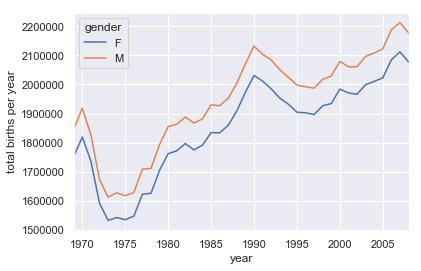

In [96]:
# We immediately see that male births outnumber female births in every decade. 
# To see this trend a bit more clearly, we can use the built-in plotting tools 
# in Pandas to visualize the total number of births by year.

import matplotlib.pyplot as plt

sns.set() # use Seaborn styles

births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

# Pandas Time Series: Indexing by Time
Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

In [97]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [98]:
# Now that we have this data in a Series, 
# we can make use of any of the Series indexing patterns,  like, 

data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [99]:
# There are additional special date-only indexing operations, 
# such as passing a year to obtain a slice of all data from that year:

data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [100]:
# pip install datetime

from datetime import datetime

dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', 
                        '2015-Jul-6', '07-07-2015', '20150708'])

dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [101]:
# A TimedeltaIndex is created, for example, 
# when one date is subtracted from another:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [102]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [103]:
# Alternatively, the date range can be specified not with a start- 
# and endpoint, but with a startpoint and a number of periods:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [104]:
# You can modify the spacing by altering the freq argument, 
# which defaults to D. For example, here we will construct a range of 
# hourly timestamps:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

![Frequency & Offset table](images/Pandas_frequency_codes.png 'frequency and offset table')

![list of Start Frequency](images/list_of_start_indexed_frequency_codes.png 'list of start frequency')

In [105]:
# On top of this, codes can be combined with numbers to specify 
# other frequencies. For example, for a frequency of 2 hours 30 minutes, 
# we can combine the hour (H) and minute (T) codes as follows:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')